In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import Point, Route
import sqlite3
from itertools import groupby
from lib.calcs import to_miles, to_metres
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
db = sqlite3.connect("./mwalks.sqlite")
db.row_factory = sqlite3.Row

In [5]:
rows = db.execute("SELECT * FROM points ORDER BY dt").fetchall()

In [6]:
pts = [Point(*row) for row in rows]

In [7]:
rts = [Route(route_id=route_id, points=list(items)) for route_id, items in groupby(pts, key=lambda pt: (pt.route_id))]

In [8]:
def mile_splits(rt: Route) -> dict:
    res ={}
    dist = 0
    secs=0
    mile = 0
    for s in rt.segments:
        dist += s.distance
        secs += s.secs
        if dist > to_metres(1):
            mile +=1
            mph = to_miles(dist) / secs * 3600.0
            res[mile] = mph
            dist = 0.0
            secs=0.0
    return res

In [9]:
splits = {rt.points[0].dt: mile_splits(rt) for rt in rts}
print(len(splits))

3633


In [10]:
by_mile = defaultdict(dict)
for dt, sp in splits.items():
    for m, mph in sp.items():
        by_mile[m][dt] = mph

In [11]:
x = list(by_mile[1].keys())
y = list(by_mile[1].values())

In [12]:
sns.set_theme()

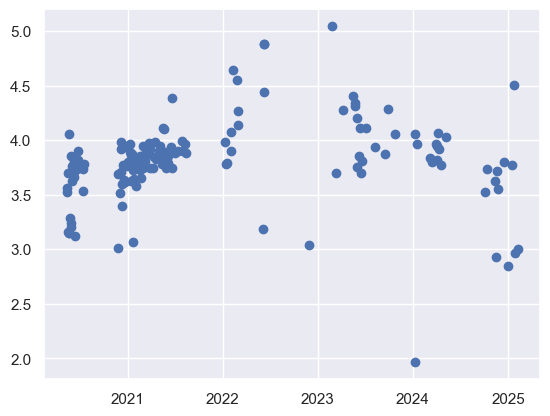

In [13]:
fig,ax = plt.subplots()
ax.plot(x,y,"o")